In [13]:
import torch
import src.datasets as my_datasets
from src.dataset_bundle import *
import pandas as pd

In [4]:
dataset = my_datasets.PACS(version='1.0', root_dir='./data', download=True)
ds_bundle = eval("PACS")(dataset, 512, probabilistic=False)

dcc


/mnt/disk1/anaconda3/envs/ndg2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/disk1/anaconda3/envs/ndg2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
total_subset = dataset.get_subset('train', transform=ds_bundle.train_transform)

In [6]:
test_dt = []
for split in dataset.split_names:
    if split != 'train':
        ds = dataset.get_subset(split, transform=ds_bundle.test_transform)
        test_dt.append(ds)

In [7]:
training_datasets = NonIIDSplitter(num_shards=5, iid=0.1, seed=42).split(dataset.get_subset('train'), ds_bundle.groupby_fields, transform=ds_bundle.train_transform)

2


domain    2   3
y              
0       179  16
1       183  22
2       140   8
3        62  11
4       136  11
5       111   1
6       189   3
--------
domain    2   3
y              
0       149  15
1       207  13
2       161  14
3        54  11
4       140  14
5       127   0
6       162   4
--------
domain   2    3
y              
0        7  221
1        7  215
2        5  221
3        2  190
4       10  224
5        5   23
6        6   44
--------
domain   2    3
y              
0        9  231
1        7  205
2        2  227
3        1  160
4        6  242
5       12   26
6        5   47
--------
domain   2    3
y              
0        7  216
1       11  214
2        6  212
3        3  178
4        2  248
5        6   22
6        7   48
--------


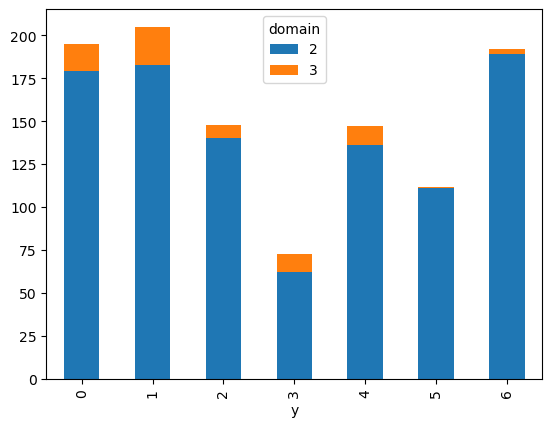

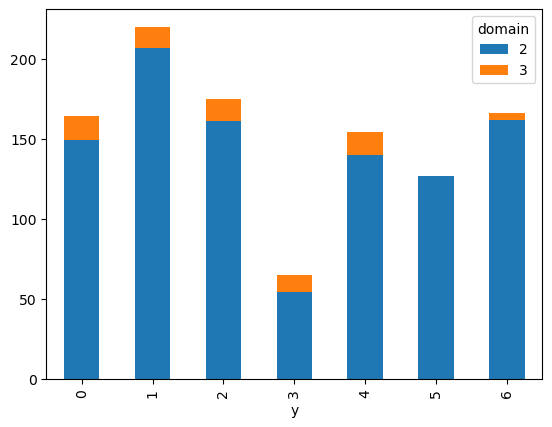

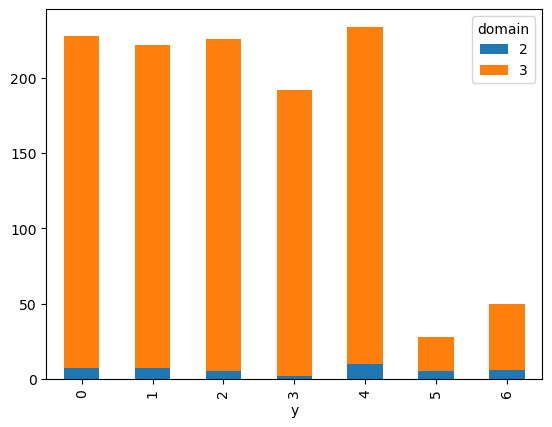

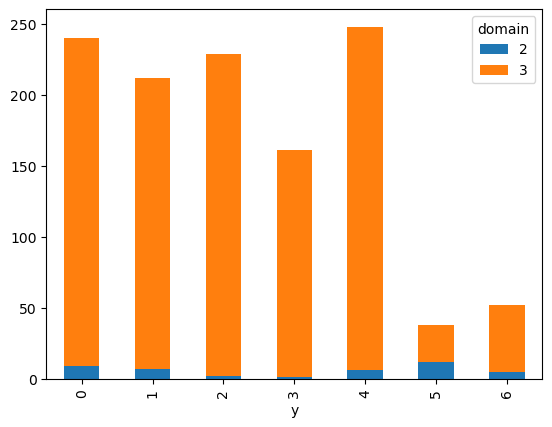

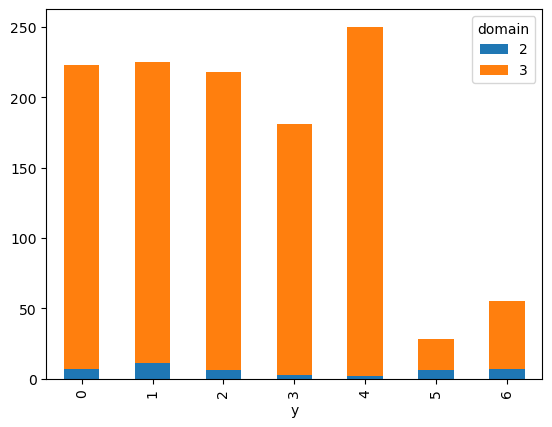

In [31]:
for idx, training_data in enumerate(training_datasets):
    metadata = training_data.metadata_array
    domains = torch.unique(metadata[:, 0])
    metadata = pd.DataFrame(metadata.numpy())
    metadata.columns = ['domain', 'y', 'x', 'source']
    results = metadata.groupby(['domain', 'y']).size().reset_index(name='count')
    converted_result = pd.pivot_table(results, values='count', index='y', columns=['domain']).fillna(0).astype(int)
    print(converted_result)
    converted_result.plot.bar(stacked=True)
    print('--------')

domain    1
y          
0       379
1       255
2       285
3       184
4       201
5       295
6       449
--------
domain    0
y          
0       189
1       202
2       182
3       186
4       199
5       280
6       432
--------
domain   2   3
y             
0       19  35
1       19  35
2       15  34
3        6  28
4       15  38
5       13   4
6       17   6
--------
domain   2   3
y             
0       19  38
1       23  36
2       17  37
3        7  30
4       15  39
5       14   4
6       19   8
--------


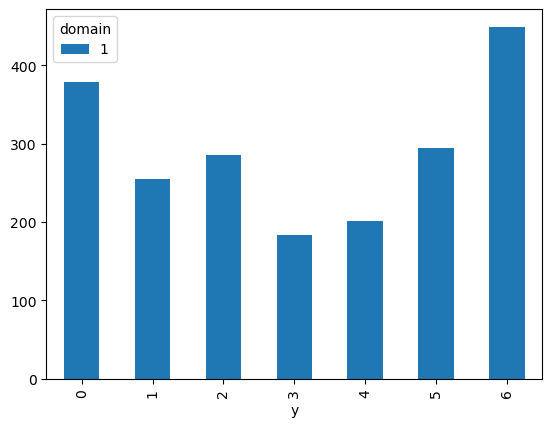

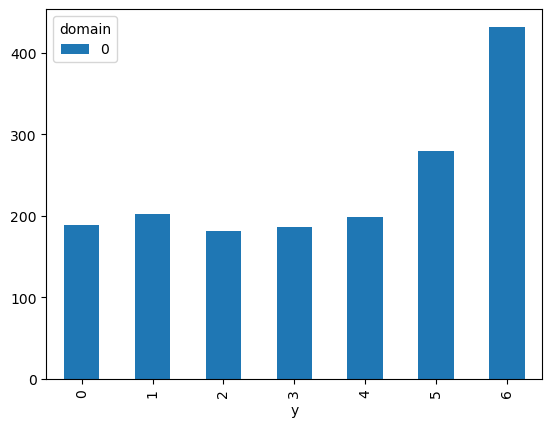

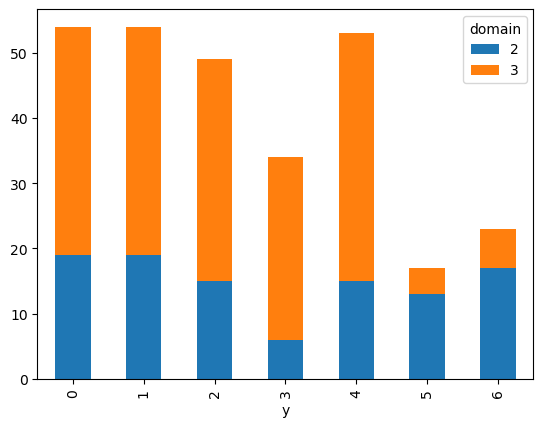

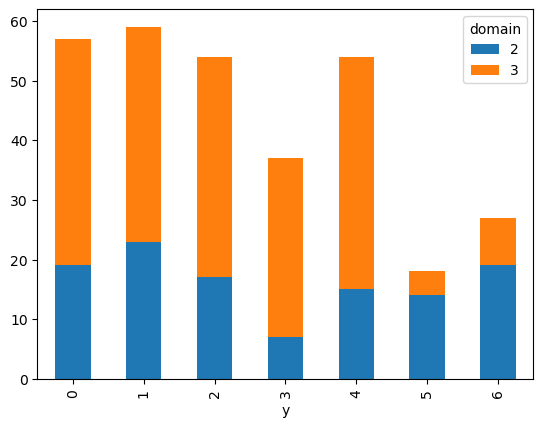

In [32]:
for idx, test_data in enumerate(test_dt):
    metadata = test_data.metadata_array
    domains = torch.unique(metadata[:, 0])
    metadata = pd.DataFrame(metadata.numpy())
    metadata.columns = ['domain', 'y', 'x', 'source']
    results = metadata.groupby(['domain', 'y']).size().reset_index(name='count')
    converted_result = pd.pivot_table(results, values='count', index='y', columns=['domain']).fillna(0).astype(int)
    print(converted_result)
    converted_result.plot.bar(stacked=True)
    print('--------')